In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from ipywidgets import interact

## Golden Codys

- 1 / 4 chance to win
- 1000 tickets

([<matplotlib.axis.XTick at 0x1a1db289d0>,
 <a list of 2 Text xticklabel objects>)

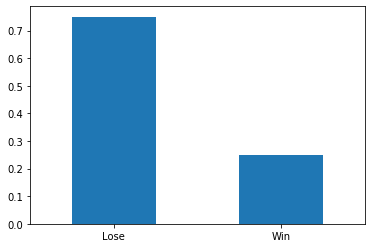

In [2]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts(normalize=True).plot.bar()
plt.xticks([0, 1], ['Lose', 'Win'], rotation=0)

We give everyone in a class a ticket

In [3]:
n = 40
tickets.sample(n).mean()

0.15

Sampling Errors

- non-response
- undercoverage
- voluntary
- leading questions
- social desireability

In [4]:
winrates = []

for i in range(10_000):
    winrate = tickets.sample(n).mean()
    winrates.append(winrate)

Central Limit Theorem: The **sampling distribution** is normally distributed even when the underlying random variable is not.

- the average of the sampling distribution ~ the population average
- the variance of the sampling distribution is the variance of the population divided by the sample size
- the standard deviation of the sampling distribution is ~ population standard deviation / $\sqrt{n}$
- the **standard error** == standard deviation of the sampling distribution

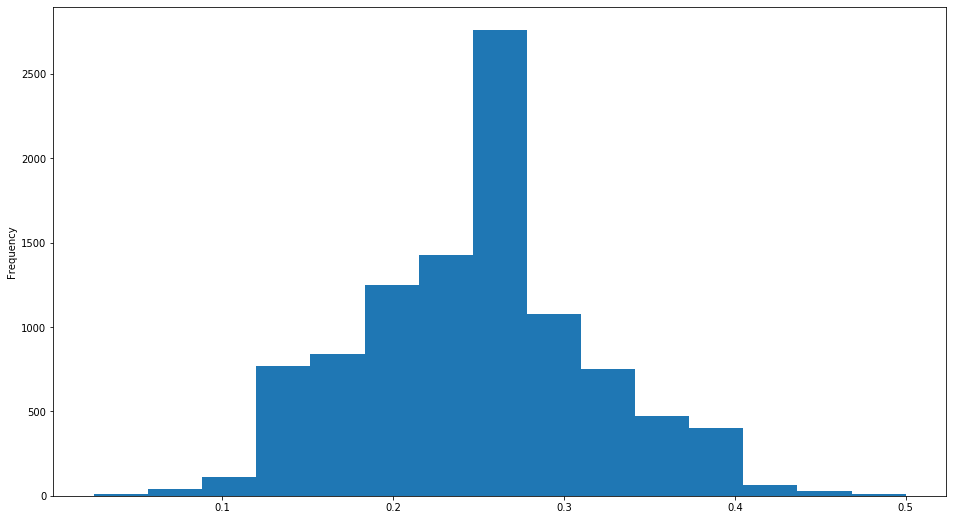

In [5]:
pd.Series(winrates).plot.hist(bins=15, figsize=(16, 9))

## Mini Exercise - CLT

1. Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
1. Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
1. Plot the distribution of the calculated averages. What do you notice? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [6]:
def plot_dice_rolls(n_dice):
    n_sims = 10_000
    rolls = np.random.choice(range(1, 7), (n_sims, n_dice))

    plt.figure(figsize=(10, 7))
    plt.hist(rolls.mean(axis=1), density=True) # density=True gives us a %
    plt.title(f'Average of {n_dice} dice rolls based on {n_sims:,} simulations')
    plt.xlim(0, 7)
    plt.ylabel('% of times we get this value')
    plt.xlabel('Average')

    plt.show()

interact(plot_dice_rolls, n_dice=(1, 50, 2))

interactive(children=(IntSlider(value=25, description='n_dice', max=50, min=1, step=2), Output()), _dom_classe…

<function __main__.plot_dice_rolls(n_dice)>

## Hypothesis Testing

- **alpha**: $\alpha$: 1 - confidence level (95% confidence level -> $\alpha = .05$)
- **null hypothesis**: $H_0$: the "status quo"
- **alterternative hyopthesis**: $H_a$: the opposite; alternative

We either *reject* or *fail to reject* the null hypothesis

One of the webdev cohorts finds they have a winrate of 20%. They claim that they were cheated! and the tickets were distributed unfairly.

In [7]:
winrates = pd.Series(winrates)

What's the likelihood we see a 20% or less winrate (w/ 40 students) given that the true winrate is 25%?

- $H_0$: the winrate for this webdev class is the same as the overall winrate
- $H_a$: the winrate the this webdev class is less than the overall winrate

In [8]:
(winrates <= .2).mean()

0.3015

There's a 30% chance we'd see a winrate of 20% *or less* knowing that the overall winrate is 25%.

In [9]:
stats.norm(winrates.mean(), winrates.std()).cdf(.2)

0.23221702414320272

**p-value**

- P(data|$H_0$)
- The likelihood the we see the evidence at hand under the null hypothesis
- If the null hypothesis is true, the likelihood of observing our data

if $p < \alpha$: we reject $H_0$

if $p >= \alpha$: we fail to reject $H_0$

CL = 95% -> alpha == .05

p = .29

Because p >= alpha, we fail to reject $H_0$: the winrate for this webdev class is the same as the overall winrate

What's the likelihood we see a 20% winrate (w/ 25 students) or something more extreme? given that the true winrate is 25%

In [10]:
stats.norm(winrates.mean(), winrates.std()).cdf(.2) + stats.norm(winrates.mean(), winrates.std()).sf(.2999999999999)

0.4586604004453259

There's a 57% chance that we'd see a winrate of 20% or something more extreme (in either direction), purely due to the nature of sampling from a population.

---

A data science class calculates their win rate at 40%. The web dev students immediately accuse the person distributing the tickets of favoritism.

How likely is it that we see a 40% winrate (or something more extreme) purely due chance, given the actual winrate is 25%?

In [11]:
winrate_distribution = stats.norm(winrates.mean(), winrates.std())

winrate_distribution.sf(.4) + winrate_distribution.cdf(.1)

0.026204778088842605

In [12]:
winrate_distribution.cdf(.1) * 2

0.02684657987700769

- Are the average grades in web development vs data science classes different?

    $H_0$: The average grades for webdev and data science are the same.
    
    $H_a$: The average grades for webdev and data science are not the same.
    
    $H_a$: The average grades for webdev students are lower than those for data science students.

- Is there a relationship between how early a student shows up to class and their grade?

    $H_0$: there is no relationship between how early a student comes to class and their grade
    
    $H_a$: students that show up to class earlier have higher grades

- Are web dev or data science students more likely to be coffee drinkers?

    $H_0$: Which cohort a student is in is independent of whether or not they drink coffee

    $H_0$: Web dev and data science students are equally likely to be coffee drinkers
    
    $H_a$: Data science students are more likely to be coffee drinkers

- **two-tailed**: $H_0$ is formulated as $\neq$
- **one-tailed**: $H_0$ is formulated as < or >

### Hypothesis Testing Results

$H_0$: data science students' grades are the same as the overall average

$H_a$: data science students' grades are greater than the overall average

|                      | $H_0$ is true | $H_0$ is false |
| -------------------  | ------------- | -------------- |
| Fail to reject $H_0$ | TN            | FN (Type II)   |
| Reject $H_0$         | FP (Type I)   | TP             |

## Examples

- 99% confident
- $\alpha = 1 - .99 = .01$
- p: P(data|$H_0$)
- $p < \alpha$ -> reject $H_0$
- $p >= \alpha$ -> fail to reject $H_0$

> Are the plants helping?

- survey scores
    - $H_0$: Survey scores before and after plants were introduced are no different.
    - $H_a$: Survey scores improved after plants were introduced in the classroom.
- conversion rate of in-person tours before/after plants
- number of tardies
- grades
- engagement on social with plant pictures

- $H_0$: Survey scores before and after plants were introduced are no different.
- $H_a$: Survey scores improved after plants were introduced in the classroom.

- True Positive
    - small p-value -- < alpha (.001)
    - reject $H_0$
    - avg survey score before plants: 3.2
    - avg survey score after plants: 4.5
- False Positive
    - small p-value
    - reject $H_0$
    - we cancelled a quiz right before everyone took the surveys
- True Negative
    - higher p-value
    - fail to reject $H_0$
    - avg survey score before plants: 3.9
    - avg survey score after plants: 4.1
- False Negative
    - higher p-value
    - fail to reject $H_0$
    - avg survey score before plants: 3.5
    - avg survey score after plants: 3.3
    - everyone took the survey when they were in the middle of the tableau project

---

> Do houses with even street numbers sell for more money?

Data Sources:

- zillow data
- realty trac
- MLS
- Compass orientation of houses
- Online Tax Records
    - tax-assessed property value

- $H_0$: the property values for even numbered houses are the same as the overall average property value
- $H_a$: the property values for even numberd houses are higher than the overall average property value

- True Positive
    - low p-value
    - reject $H_0$
    - avg property value for even # houses -> \$200,000
    - avg property value overall -> \$150,000
- False Positive
    - low p-value
    - reject $H_0$
    - a significant difference in property values
    - we found the overall average property value from the county website
    - we calculated the average property value for even # houses based on sampling the dominion
- False Negative
    - fail to reject $H_0$
    - high p-value
    - the average house price for even numbered houses is not higher than the overall average
    - for example: response bias on an online survey
- True Negative
    - high p-value
    - fail to reject $H_0$
    - avg price for even # houses: \$145,000
    - overall avg house price: \$140,000

## Exercise Review

2 x 2 categories

- False / True: Whether we concluded the right thing
- Positive / Negative: Whether we concluded there is something (+) or there isn't something hapenning (-)

> Has the network latency gone up since we switched ISPs?

- $H_0$: the network latency is the same since the ISP switch.
- $H_a$: the new ISP has higher latency
- True Positive: We reject $H_0$, our latency is ~ 300ms on average with the new ISP, it was ~50ms
- False Positive: We reject $H_0$, our data says the latency is higher; our data is biased, we took recordings between 6pm and 8pm when everyone is streaming media
- False Negative: We fail to reject $H_0$: we took recordings between 6am and 7am when no one is on the network
- True Negative: Our data says there isn't much difference in latency, we fail to reject $H_0$

> Is the website redesign any good?

- $H_0$: the number of click throughs since the site redesign hasn't changed
- $H_a$: there are more click throughs since the site redesign
- TP: reject $H_0$, we conclude that the redesign helped, and it really did
- FP: reject $H_0$, we conclude that the redesign helped, but really it didn't; we only showed the new website to previously engaged customers
- FN: fail to reject $H_0$, we conclude the redesign did not help, but really it did; we only showed the new website to people who provided negative feedback
- TN: fail to reject $H_0$, we conclude the redesign did not help, and it really didn't

> Is our TV ad driving more sales?

We're frito-lay advertising cool ranch doritos.

- $H_0$: Cool ranch doritos don't sell any better when we're running an advertisement
- $H_a$: Sales for cool ranch doritos increase when we're running an ad
- FP: reject $H_0$; we conclude that the advertisement helped sales, but really it didn't
- FN: fail to reject $H_0$; we conclude that the ad did not help, but really it did
- TP: reject $H_0$; we conclude that the ad helped, and it did
- TN: fail to reject $H_0$: we conclude the ad did not boost sales, and really it didn't

> suppose we a production issue while the ad is running -- there's not enough product to sell, sales are low

- FN: conclude that the ad didn't help, but really it did, we just didn't have enough inventory

> suppose there's a global pandemic, and everyone is staying inside while the ad is running. There's increased sales of cool ranch doritos.

- FP: conclude that the ad helped, when really it didn't